<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('dataset/New_York_City_Leading_Causes_of_Death.csv')
data

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,515,79.726669113,78.865386427
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,498,77.094914987,81.605131438
2,2015,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,95,14.706861293,15.337930564
3,2015,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,89,13.778006895,14.706362334
4,2015,Diabetes Mellitus (E10-E14),Female,Asian and Pacific Islander,71,10.991443703,11.537396764
...,...,...,...,...,...,...,...
1511,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Other Race/ Ethnicity,6,.,.
1512,2012,Diabetes Mellitus (E10-E14),F,Black Non-Hispanic,409,39.1,33.8
1513,2012,Chronic Lower Respiratory Diseases (J40-J47),F,Asian and Pacific Islander,39,6.7,8
1514,2012,Chronic Lower Respiratory Diseases (J40-J47),F,Not Stated/Unknown,8,.,.


## Display top 7 rows of the dataframe in your notebook

In [2]:
data.head(7)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,515,79.726669113,78.865386427
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,498,77.094914987,81.605131438
2,2015,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,95,14.706861293,15.337930564
3,2015,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,89,13.778006895,14.706362334
4,2015,Diabetes Mellitus (E10-E14),Female,Asian and Pacific Islander,71,10.991443703,11.537396764
5,2015,Alzheimer's Disease (G30),Female,Asian and Pacific Islander,50,7.7404533119,8.4169129758
6,2015,Chronic Lower Respiratory Diseases (J40-J47),Female,Asian and Pacific Islander,41,6.3471717158,6.670309854


## Count number of null values (if any) for each column

In [3]:
data.isnull().sum()

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                       0
Death Rate                 157
Age Adjusted Death Rate    157
dtype: int64

> Dari data yang digunakan diatas, data yang berupa null value tidak hanya berupa data yang tidak memiliki value, namun data yang berisi "." juga merupakan data yang bisa dianggap sebagai null value. Jadi untuk jumlah data null akan berubah menjadi sebagai berikut

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1516 non-null   int64 
 1   Leading Cause            1516 non-null   object
 2   Sex                      1516 non-null   object
 3   Race Ethnicity           1516 non-null   object
 4   Deaths                   1516 non-null   object
 5   Death Rate               1359 non-null   object
 6   Age Adjusted Death Rate  1359 non-null   object
dtypes: int64(1), object(6)
memory usage: 83.0+ KB


In [5]:
data['Deaths'].replace('.', np.nan, inplace=True)

In [6]:
data.isnull().sum()

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                     138
Death Rate                 157
Age Adjusted Death Rate    157
dtype: int64

> Dari informasi diatas dapat diketahui bahwa data yang memiliki null adalah kolom 'Deaths', 'Death Rate', dan 'Age Adjusted Death Rate'. Namun kita tahu bahwa kolom 'Deaths', 'Death Rate', 'Age Adjusted Death Rate' seharusnya bertipe data numeric sehingga perlu pengubahan tipe data. Kemudian saya akan menghapus data null yang ada di Deaths, Death Rate, dan Age Adjusted Death Rate. Jika data null hanya disalah satu atau salah dua dari ketiga kolom tersebut maka tidak saya hapus.

In [7]:
data = data[pd.to_numeric(data['Deaths'], errors='coerce').notnull()]
data.reset_index(drop=True)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,515,79.726669113,78.865386427
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,498,77.094914987,81.605131438
2,2015,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,95,14.706861293,15.337930564
3,2015,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,89,13.778006895,14.706362334
4,2015,Diabetes Mellitus (E10-E14),Female,Asian and Pacific Islander,71,10.991443703,11.537396764
...,...,...,...,...,...,...,...
1373,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Other Race/ Ethnicity,6,.,.
1374,2012,Diabetes Mellitus (E10-E14),F,Black Non-Hispanic,409,39.1,33.8
1375,2012,Chronic Lower Respiratory Diseases (J40-J47),F,Asian and Pacific Islander,39,6.7,8
1376,2012,Chronic Lower Respiratory Diseases (J40-J47),F,Not Stated/Unknown,8,.,.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     1378 non-null   int64 
 1   Leading Cause            1378 non-null   object
 2   Sex                      1378 non-null   object
 3   Race Ethnicity           1378 non-null   object
 4   Deaths                   1378 non-null   object
 5   Death Rate               1221 non-null   object
 6   Age Adjusted Death Rate  1221 non-null   object
dtypes: int64(1), object(6)
memory usage: 86.1+ KB


In [9]:
nums = ['Death Rate', 'Age Adjusted Death Rate']
data['Deaths'] = pd.to_numeric(data['Deaths'])
data[nums] = data[nums].apply(pd.to_numeric, errors='coerce', axis=1)

<ipython-input-9-553d2125955f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Deaths'] = pd.to_numeric(data['Deaths'])
c:\users\kamal\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1378 non-null   int64  
 1   Leading Cause            1378 non-null   object 
 2   Sex                      1378 non-null   object 
 3   Race Ethnicity           1378 non-null   object 
 4   Deaths                   1378 non-null   int64  
 5   Death Rate               973 non-null    float64
 6   Age Adjusted Death Rate  973 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 86.1+ KB


## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [11]:
data = data.drop(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths'], axis=1)
data

,Death Rate,Age Adjusted Death Rate
0,79.726669,78.865386
1,77.094915,81.605131
2,14.706861,15.337931
3,13.778007,14.706362
4,10.991444,11.537397
...,...,...
1511,NaN,NaN
1512,39.100000,33.800000
1513,6.700000,8.000000
1514,NaN,NaN


## Display the average, median, and standard deviation of each of your numerical columns

In [12]:
stat = data.agg(['mean','median', 'std'])
stat

,Death Rate,Age Adjusted Death Rate
mean,53.632101,52.342639
median,18.860426,19.690289
std,75.036033,66.958025


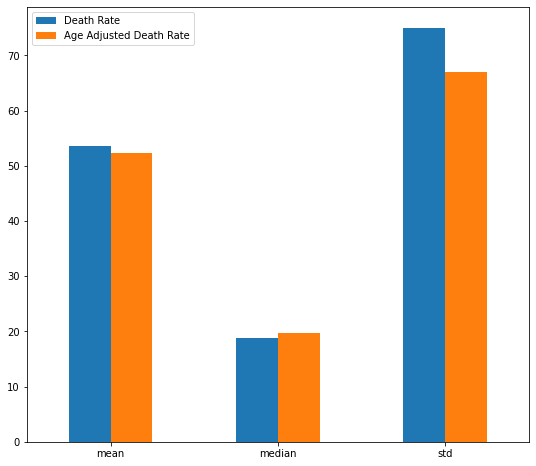

In [13]:
stat.plot(y=["Death Rate","Age Adjusted Death Rate"], kind="bar",figsize=(9,8))
plt.xticks(rotation=0)
plt.show()

In [14]:
data['Death Rate'].mean()

53.63210073668993

## Plot two of the numerical columns one against the other in a scatter plot

<AxesSubplot:xlabel='Death Rate', ylabel='Age Adjusted Death Rate'>

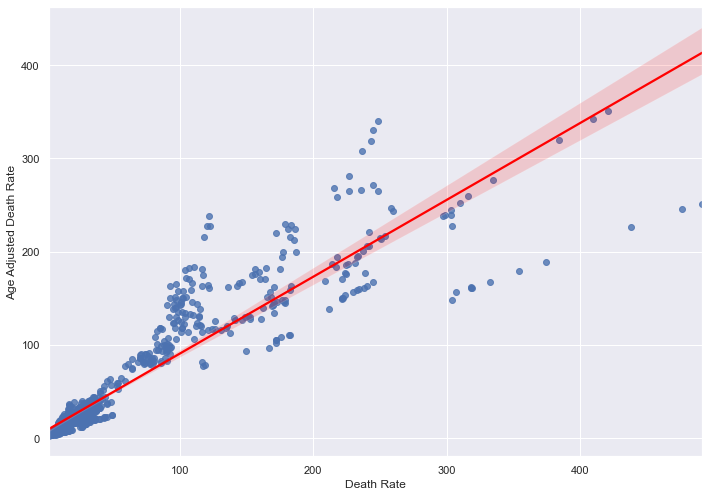

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(data=data, 
            x="Death Rate", y="Age Adjusted Death Rate",
            line_kws={"color": "red"})

## Plot your data distributions in histogram and boxplot

<AxesSubplot:xlabel='Death Rate', ylabel='Count'>

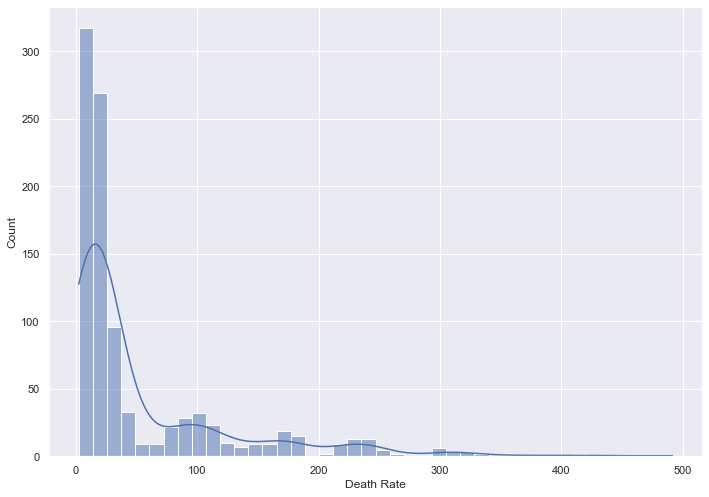

In [16]:
sns.histplot(data=data, x="Death Rate", kde=True)

<AxesSubplot:xlabel='Age Adjusted Death Rate', ylabel='Count'>

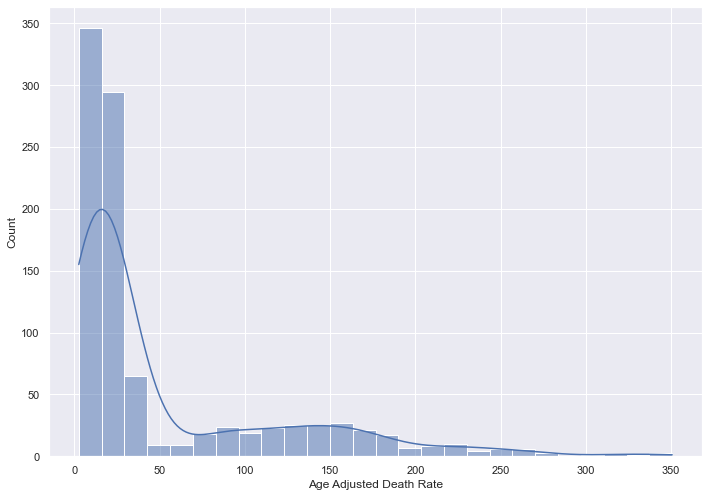

In [17]:
sns.histplot(data=data, x="Age Adjusted Death Rate", kde=True)

<AxesSubplot:>

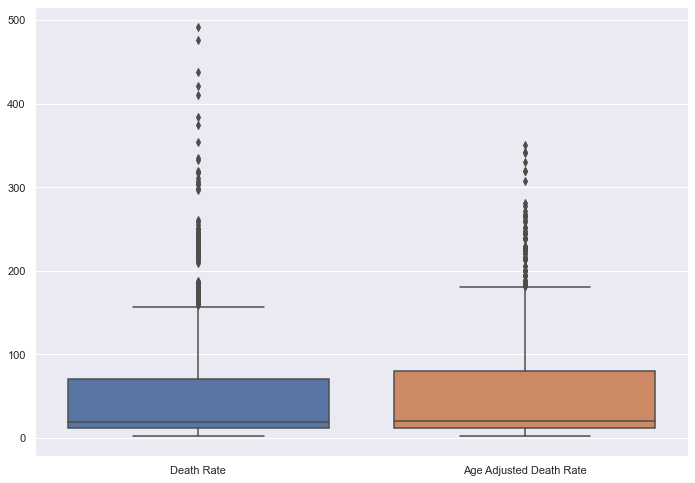

In [18]:
sns.boxplot(data=data, orient='v')

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [19]:
data = data.assign(**{'DR_Raised_power_value': data['Death Rate'].apply(lambda x:x**2), 'AADR_Raised_power_value': data['Age Adjusted Death Rate'].apply(lambda x:x**2)})
data

,Death Rate,Age Adjusted Death Rate,DR_Raised_power_value,AADR_Raised_power_value
0,79.726669,78.865386,6356.341768,6219.749176
1,77.094915,81.605131,5943.625917,6659.397477
2,14.706861,15.337931,216.291769,235.252114
3,13.778007,14.706362,189.833474,216.277093
4,10.991444,11.537397,120.811835,133.111524
...,...,...,...,...
1511,NaN,NaN,NaN,NaN
1512,39.100000,33.800000,1528.810000,1142.440000
1513,6.700000,8.000000,44.890000,64.000000
1514,NaN,NaN,NaN,NaN


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [30]:
import wget
url = 'https://s3.amazonaws.com/tripdata/201709-citibike-tripdata.csv.zip'
filename = wget.download(url, out='dataset')
filename

100% [........................................................................] 65875226 / 65875226

'dataset/201709-citibike-tripdata.csv.zip'

In [32]:
import zipfile
local_zip = 'dataset/201709-citibike-tripdata.csv.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('dataset')
zip_ref.close()

In [20]:
df = pd.read_csv('dataset/201709-citibike-tripdata.csv')
df.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
995800,701,2017-09-17 14:34:27,2017-09-17 14:46:08,3416,7 Ave & Park Pl,40.677615,-73.973243,3396,Clinton St & 4 Place,40.678356,-74.000145,26694,Subscriber,1985.0,1
1063338,148,2017-09-18 16:37:12,2017-09-18 16:39:40,383,Greenwich Ave & Charles St,40.735238,-74.000271,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,24964,Subscriber,1991.0,1
997203,341,2017-09-17 14:50:00,2017-09-17 14:55:42,3159,W 67 St & Broadway,40.774925,-73.982666,423,W 54 St & 9 Ave,40.765849,-73.986905,17381,Subscriber,1974.0,1
1836033,334,2017-09-30 10:13:46,2017-09-30 10:19:20,223,W 13 St & 7 Ave,40.737815,-73.999947,435,W 21 St & 6 Ave,40.741740,-73.994156,27820,Subscriber,1961.0,1
1846188,1407,2017-09-30 12:56:01,2017-09-30 13:19:29,466,W 25 St & 6 Ave,40.743954,-73.991449,523,W 38 St & 8 Ave,40.754666,-73.991382,17149,Customer,NaN,0
1449213,13024,2017-09-24 14:36:57,2017-09-24 18:14:02,217,Old Fulton St,40.702772,-73.993836,151,Cleveland Pl & Spring St,40.722104,-73.997249,27656,Customer,NaN,0
1696432,348,2017-09-28 07:49:28,2017-09-28 07:55:16,3231,E 67 St & Park Ave,40.767801,-73.965921,522,E 51 St & Lexington Ave,40.757148,-73.972078,15549,Subscriber,1966.0,1
124045,1632069,2017-09-04 00:32:33,2017-09-22 21:53:43,513,W 56 St & 10 Ave,40.768254,-73.988639,3432,NYCBS Depot - GOW,40.669060,-73.994637,27475,Customer,NaN,0
1617988,620,2017-09-26 22:16:14,2017-09-26 22:26:35,267,Broadway & W 36 St,40.750977,-73.987654,382,University Pl & E 14 St,40.734927,-73.992005,27703,Subscriber,1965.0,2
615476,1294,2017-09-11 21:39:40,2017-09-11 22:01:15,3409,Bergen St & Smith St,40.686744,-73.990632,3041,Kingston Ave & Herkimer St,40.678907,-73.941428,29846,Subscriber,1986.0,2


## What is the average number of trips for each day-of-week?
Process the data and plot your answer

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


In [22]:
time = ['starttime', 'stoptime']
df[time] = df[time].apply(pd.to_datetime, errors='coerce', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         int64         
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           int64         
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth year               float64       
 14  gender                   int64         
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 214.9+ MB


In [24]:
df.sort_values(by='starttime', inplace=True, ignore_index=True)

In [25]:
df['count'] = 1

In [26]:
perhari = df.resample('D', on='starttime')['count'].sum()
df_perhari = pd.DataFrame(perhari)
df_perhari.reset_index(inplace=True)
df_perhari

,starttime,count
0,2017-09-01,54881
1,2017-09-02,37812
2,2017-09-03,30955
3,2017-09-04,55285
4,2017-09-05,65445
5,2017-09-06,42295
6,2017-09-07,69519
7,2017-09-08,69574
8,2017-09-09,60155
9,2017-09-10,60711


In [27]:
perhari_seminggu = df_perhari.resample('W', on='starttime')['count'].mean()
df_perhari_seminggu = pd.DataFrame(perhari_seminggu)
df_perhari_seminggu.reset_index(inplace=True)
df_perhari_seminggu

,starttime,count
0,2017-09-03,41216.000000
1,2017-09-10,60426.285714
2,2017-09-17,68776.285714
3,2017-09-24,64457.714286
4,2017-10-01,66471.333333


In [28]:
df_perhari_seminggu['count'].mean()

60269.52380952381

> Jadi jumlah rata-rata perjalanan untuk setiap hari dalam seminggu adalah 60.269. Jumlah tersebut merupakan rata-rata selama 4 minggu dari keseluruhan data.

[Text(0, 0, 'Friday, 01 September'),
 Text(1, 0, 'Saturday, 02 September'),
 Text(2, 0, 'Sunday, 03 September'),
 Text(3, 0, 'Monday, 04 September'),
 Text(4, 0, 'Tuesday, 05 September'),
 Text(5, 0, 'Wednesday, 06 September'),
 Text(6, 0, 'Thursday, 07 September'),
 Text(7, 0, 'Friday, 08 September'),
 Text(8, 0, 'Saturday, 09 September'),
 Text(9, 0, 'Sunday, 10 September'),
 Text(10, 0, 'Monday, 11 September'),
 Text(11, 0, 'Tuesday, 12 September'),
 Text(12, 0, 'Wednesday, 13 September'),
 Text(13, 0, 'Thursday, 14 September'),
 Text(14, 0, 'Friday, 15 September'),
 Text(15, 0, 'Saturday, 16 September'),
 Text(16, 0, 'Sunday, 17 September'),
 Text(17, 0, 'Monday, 18 September'),
 Text(18, 0, 'Tuesday, 19 September'),
 Text(19, 0, 'Wednesday, 20 September'),
 Text(20, 0, 'Thursday, 21 September'),
 Text(21, 0, 'Friday, 22 September'),
 Text(22, 0, 'Saturday, 23 September'),
 Text(23, 0, 'Sunday, 24 September'),
 Text(24, 0, 'Monday, 25 September'),
 Text(25, 0, 'Tuesday, 26 Septembe

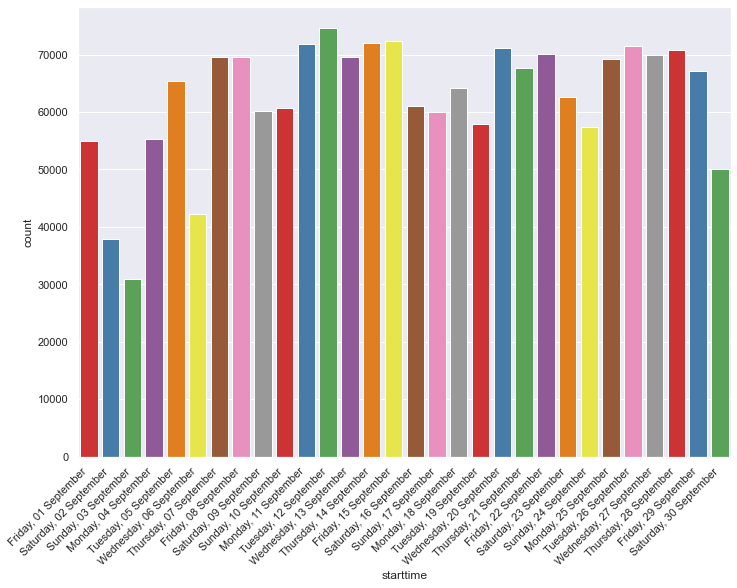

In [29]:
graf = sns.barplot(x="starttime", y="count", palette='Set1', data=df_perhari.head(30))
graf.set_xticklabels(df_perhari['starttime'].head(30).dt.strftime('%A, %d %B'), rotation=45, horizontalalignment='right')

> Dari grafik diatas kita tahu bahwa pola orang orang US mengikuti program ini rata rata di hari rabu, kamis, dan jumat. Sedangkan dihari weekend selalu mengalami penurunan dibanding dengan weekdays. Sehingga dapat disimpulkan bahwa orang US lebih tertarik mengikuti program ini di weekdays khususnya rabu, kamis,dan jumat.

## What is the average number of trips by hour of day?

In [30]:
perjam = df.resample('H', on='starttime')['count'].sum()
df_perjam = pd.DataFrame(perjam)
df_perjam.reset_index(inplace=True)
df_perjam

,starttime,count
0,2017-09-01 00:00:00,535
1,2017-09-01 01:00:00,292
2,2017-09-01 02:00:00,125
3,2017-09-01 03:00:00,82
4,2017-09-01 04:00:00,87
...,...,...
715,2017-09-30 19:00:00,2501
716,2017-09-30 20:00:00,1770
717,2017-09-30 21:00:00,1456
718,2017-09-30 22:00:00,1178


In [31]:
perjam_sehari = df_perjam.resample('D', on='starttime')['count'].mean()
df_perjam_sehari = pd.DataFrame(perjam_sehari)
df_perjam_sehari.reset_index(inplace=True)
df_perjam_sehari

,starttime,count
0,2017-09-01,2286.708333
1,2017-09-02,1575.500000
2,2017-09-03,1289.791667
3,2017-09-04,2303.541667
4,2017-09-05,2726.875000
5,2017-09-06,1762.291667
6,2017-09-07,2896.625000
7,2017-09-08,2898.916667
8,2017-09-09,2506.458333
9,2017-09-10,2529.625000


In [32]:
df_perjam_sehari['count'].mean()

2608.4694444444444

> Jadi rata-rata jumlah perjalanan per jam dalam sehari adalah 2608. Jumlah tersebut merupakan rata-rata selama 30 hari dari keseluruhan data.

<AxesSubplot:xlabel='starttime', ylabel='count'>

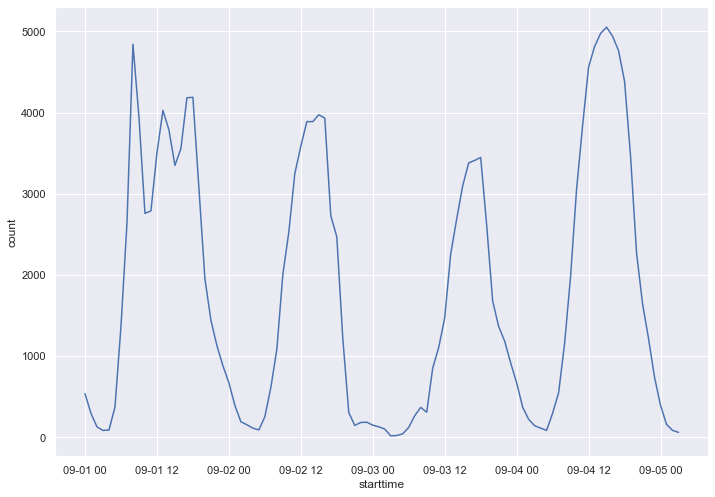

In [33]:
sns.lineplot(x=df_perjam['starttime'].head(100), y=df_perjam['count'].head(100))

> Terlihat dari grafik diatas bahwa trafic orang US yang bersepeda di program City Bike mengalami peningkatan di jam 12 siang. dimana rata rata pada jam 12 siang pengguna sepeda berada pada grafik tertinggi. Sehingga dapat disimpulkan bahwa orang US yang mengikuti program ini rata-rata mengikutinya di jam 12 hingga 16.

## What is the correlation between age and trip duration?

In [34]:
df['Age']=df['birth year'].apply(lambda x:2021-x)

In [35]:
df[['Age', 'tripduration']].corr()

,Age,tripduration
Age,1.000000,-0.004168
tripduration,-0.004168,1.000000


<AxesSubplot:xlabel='Age', ylabel='tripduration'>

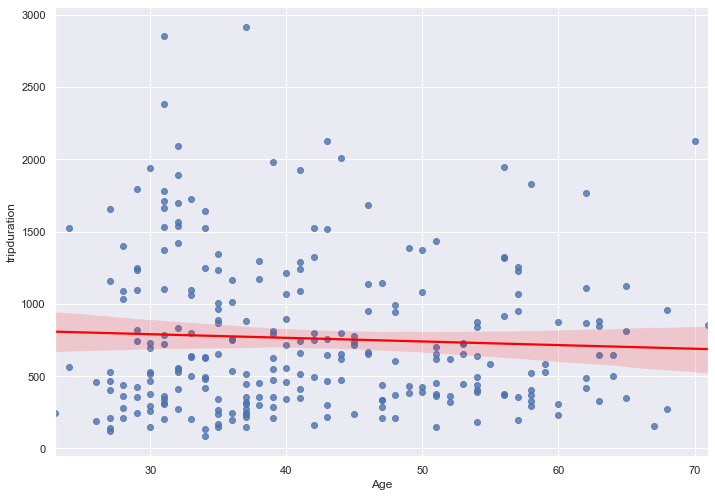

In [36]:
sns.regplot(data=df.sample(300, random_state=1), 
            x="Age", y="tripduration",
            line_kws={"color": "red"})

> Dapat dilihat dan disimpulkan bahwa korelasi dari Age dan tripduration sangat kecil atau hampir mendekati 0. Hal tersebut menunjukkan bahwa kedua variable tersebut tidak memiliki hubungan yang saling terkait dan tidak saling mempengaruhi.

> Walaupun korelasi sangat kecil tapi nilai korelasi menunjukkan hasil negatif dimana korelasi negatif menunjukkan jika semakin tinggi umur akan berbanding terbalik dengan tripdurasinya yaitu akan semakin kecil. Sehingga hal tersebut sangat logis jika semakin tua maka durasi bersepedanya semakin kecil.

## What is the average number of daily trips?

In [37]:
df_perhari.head(14)

,starttime,count
0,2017-09-01,54881
1,2017-09-02,37812
2,2017-09-03,30955
3,2017-09-04,55285
4,2017-09-05,65445
5,2017-09-06,42295
6,2017-09-07,69519
7,2017-09-08,69574
8,2017-09-09,60155
9,2017-09-10,60711


In [38]:
df_perhari['count'].mean()

62603.26666666667

> Rata-rata jumlah orang yang mengikuti program city bike adalah sebanyak 62.603 perharinya. Jumlah tersebut merupakan rata-rata harian dalam sebulan atau keseluruhan data.

## Come up with a question on the Citibike data usage and formulate your hypothesis

Example: 

Women are less likely than men to choose biking for commuting.

Null Hypothesis: 

The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### Hypothesis

- Apakah dalam program ini orang yang mengikutinya kebanyakan wanita atau pria
- Apakah ada pengaruh gender terhadap durasi bersepeda
- Apakah rata-rata orang yang berumur tua bergender pria atau wanita

## Work with your dataset and show your findings to help answer your question

Kita Asumsikan bahwa orang yang bergender pria memiliki value 1 sedangkan untuk gender wanita memiliki value 2, dan anggap bahwa value 0 adalah gender yang tidak diketahui.

Kita Asumsikan bahwa orang yang berumur tua memiliki umur lebih dari 40, dan untuk umur dibawah itu dikategorikan sebagai umur muda.

In [39]:
df.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,count,Age
172216,905,2017-09-04 19:42:34,2017-09-04 19:57:39,3263,Cooper Square & E 7 St,40.729236,-73.990868,528,2 Ave & E 31 St,40.742909,-73.977061,30910,Subscriber,1949.0,1,1,72.0
1730949,1390,2017-09-28 16:36:19,2017-09-28 16:59:30,3355,E 66 St & Madison Ave,40.768009,-73.968453,212,W 16 St & The High Line,40.743349,-74.006818,21108,Subscriber,1952.0,1,1,69.0
1192461,1952,2017-09-20 16:53:30,2017-09-20 17:26:03,2008,Little West St & 1 Pl,40.705693,-74.016777,458,11 Ave & W 27 St,40.751396,-74.005226,26874,Customer,1973.0,1,1,48.0
81086,714,2017-09-02 15:53:27,2017-09-02 16:05:21,3282,5 Ave & E 88 St,40.783070,-73.959390,457,Broadway & W 58 St,40.766953,-73.981693,21264,Subscriber,1991.0,2,1,30.0
103507,499,2017-09-03 15:18:40,2017-09-03 15:27:00,388,W 26 St & 10 Ave,40.749718,-74.002950,345,W 13 St & 6 Ave,40.736494,-73.997044,28361,Subscriber,1986.0,2,1,35.0
1253445,774,2017-09-21 14:46:45,2017-09-21 14:59:40,490,8 Ave & W 33 St,40.751551,-73.993934,383,Greenwich Ave & Charles St,40.735238,-74.000271,30789,Subscriber,1978.0,1,1,43.0
1692667,329,2017-09-28 06:47:49,2017-09-28 06:53:18,410,Suffolk St & Stanton St,40.720664,-73.985180,265,Stanton St & Chrystie St,40.722293,-73.991475,18264,Subscriber,1985.0,1,1,36.0
1543994,1894,2017-09-25 20:58:51,2017-09-25 21:30:25,168,W 18 St & 6 Ave,40.739713,-73.994564,297,E 15 St & 3 Ave,40.734232,-73.986923,26780,Subscriber,1987.0,1,1,34.0
1062390,612,2017-09-18 16:23:56,2017-09-18 16:34:08,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,3497,Pleasant Ave & E 116 St,40.794988,-73.933335,27368,Subscriber,1989.0,1,1,32.0
462232,1981,2017-09-09 15:57:41,2017-09-09 16:30:42,228,E 48 St & 3 Ave,40.754601,-73.971879,327,Vesey Pl & River Terrace,40.715338,-74.016584,28136,Subscriber,1962.0,1,1,59.0


In [40]:
df['Kelompok Usia'] = df['Age'].apply(lambda x:'Tua' if x>40 else 'Muda')

In [41]:
df[df['gender']>0]['gender'].value_counts()

1    1218524
2     444132
Name: gender, dtype: int64

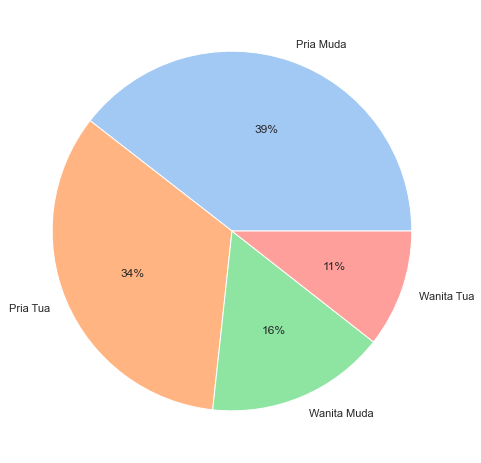

In [42]:
#define data
kelas_usia = [len(df[(df['gender']==1) & (df['Kelompok Usia']=='Muda')]), len(df[(df['gender']==1) &\
            (df['Kelompok Usia']=='Tua')]), len(df[(df['gender']==2) & (df['Kelompok Usia']=='Muda')]),\
              len(df[(df['gender']==2) & (df['Kelompok Usia']=='Tua')])]
labels = ['Pria Muda', 'Pria Tua', 'Wanita Muda', 'Wanita Tua']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
plt.pie(kelas_usia, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

> Dapat disimpulkan bahwa dalam program city bike ini kebanyakan orang yang mengikutinya bergender Pria. Pria yang mengikuti program ini berjumlah 1.218.524, dimana secara persentase jumlah pria 73,28% dari total keseluruhan peserta yang diketahui gendernya.

> Selain itu jumlah orang yang tua banyak didominasi dari gender pria dibanding dengan wanita. Dengan persentase pria tua adalah 34% dari total peserta, dibanding wanita tua hanya 11% dari total.

In [43]:
CGT = df[df['gender']>0][['gender','tripduration']]
CGT.corr()

,gender,tripduration
gender,1.000000,0.007332
tripduration,0.007332,1.000000


<AxesSubplot:xlabel='gender', ylabel='tripduration'>

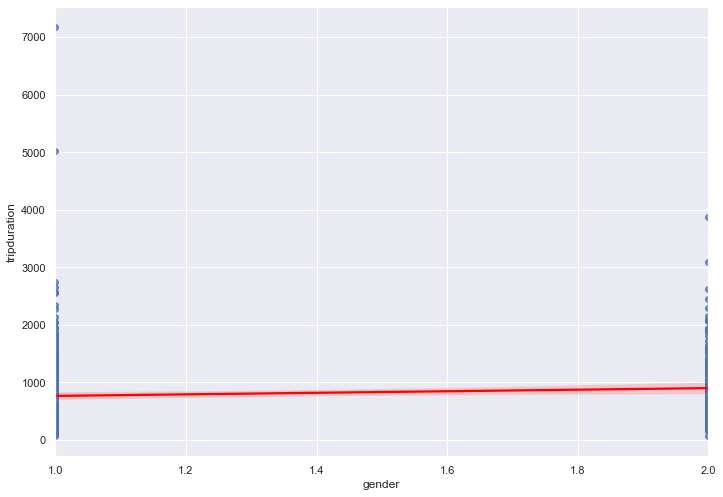

In [45]:
sns.regplot(data=CGT.sample(500, random_state=1), 
            x="gender", y="tripduration",
            line_kws={"color": "red"})

In [46]:
CGT.groupby('gender')['tripduration'].max()

gender
1    2215580
2    1661306
Name: tripduration, dtype: int64

> Dapat dilihat dari diagram garis diatas menunjukkan bahwa korelasi antara gender dengan durasi bersepeda sangat kecil. Sehingga dapat disimpulkan hubungan antara kedua variable tersebut hampir tidak ada dan tidak saling mempengaruhi. 

> Untuk nilai korelasi menunjukkan nilai positif sehingga ada kemungkinan kecil bahwa seorang wanita akan memiliki durasi yang lebih banyak dibanding dengan pria. Hal tersebut mungkin dikarenakan jumlah pria yang tua lebih banyak dibanding dengan wanita. Namun untuk durasi maksimal bersepeda dilakukan oleh pria selama 36,9 menit, sedangkan pada wanita maksimalnya hanya 27,69 menit. Sehingga korelasi antara gender dan lama durasi bersepeda tidak dapat disimpulkan dikarenakan jumlah data antara pria dan wanita cukup timpang.

In [48]:
GA = df[df['gender']>0][['gender','Age']]
GA

,gender,Age
0,1,28.0
1,1,33.0
2,1,52.0
3,1,28.0
4,1,34.0
...,...,...
1878092,2,41.0
1878093,2,35.0
1878094,1,35.0
1878096,1,31.0


In [49]:
GA.groupby('gender')['Age'].mean()

gender
1    41.834340
2    40.458015
Name: Age, dtype: float64

In [50]:
GA.groupby('gender')['Age'].min()

gender
1    20.0
2    20.0
Name: Age, dtype: float64

In [51]:
GA.groupby('gender')['Age'].max()

gender
1    136.0
2    135.0
Name: Age, dtype: float64

> Dari data diatas menunjukkan bahwa rata-rata usia pada pria dan wanita hampir mendekati usia 40an. Usia pria pada program tersebut rata-rata adalah 42an, sedangkan usia wanita sekitar 40. Untuk usia minimal antara pria dan wanita adalah sama yaitu 20. Sedangkan untuk usia maksimal pria lebih tinggi dibanding wanita yaitu 136 dan 135.